In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("/Users/prem/Downloads/Student_Performance.csv")

In [3]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.0,Yes,9.0,1.0,91
1,4.0,82.0,No,4.0,2.0,65
2,8.0,51.0,Yes,7.0,2.0,45
3,5.0,52.0,Yes,5.0,2.0,36
4,7.0,75.0,No,8.0,5.0,66


In [4]:
data.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1.0,49.0,Yes,4.0,2.0,23
9996,7.0,64.0,Yes,8.0,5.0,58
9997,6.0,83.0,Yes,8.0,5.0,74
9998,9.0,97.0,Yes,7.0,0.0,95
9999,7.0,74.0,No,8.0,1.0,64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9998 non-null   float64
 1   Previous Scores                   9995 non-null   float64
 2   Extracurricular Activities        9991 non-null   object 
 3   Sleep Hours                       9992 non-null   float64
 4   Sample Question Papers Practiced  9994 non-null   float64
 5   Performance Index                 10000 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 468.9+ KB


In [6]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9998.000000,9995.000000,9992.000000,9994.000000,10000.000000
mean,4.993199,69.450525,6.530224,4.583550,55.224800
std,2.589472,17.344294,1.695546,2.867234,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [7]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [8]:
data.shape

(10000, 6)

In [9]:
data.isnull().sum()

Hours Studied                       2
Previous Scores                     5
Extracurricular Activities          9
Sleep Hours                         8
Sample Question Papers Practiced    6
Performance Index                   0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [12]:
data.corr()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012127,0.002230,0.016741,0.373971
Previous Scores,-0.012127,1.000000,0.006147,0.008402,0.915203
Sleep Hours,0.002230,0.006147,1.000000,0.003971,0.048617
Sample Question Papers Practiced,0.016741,0.008402,0.003971,1.000000,0.043336
Performance Index,0.373971,0.915203,0.048617,0.043336,1.000000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

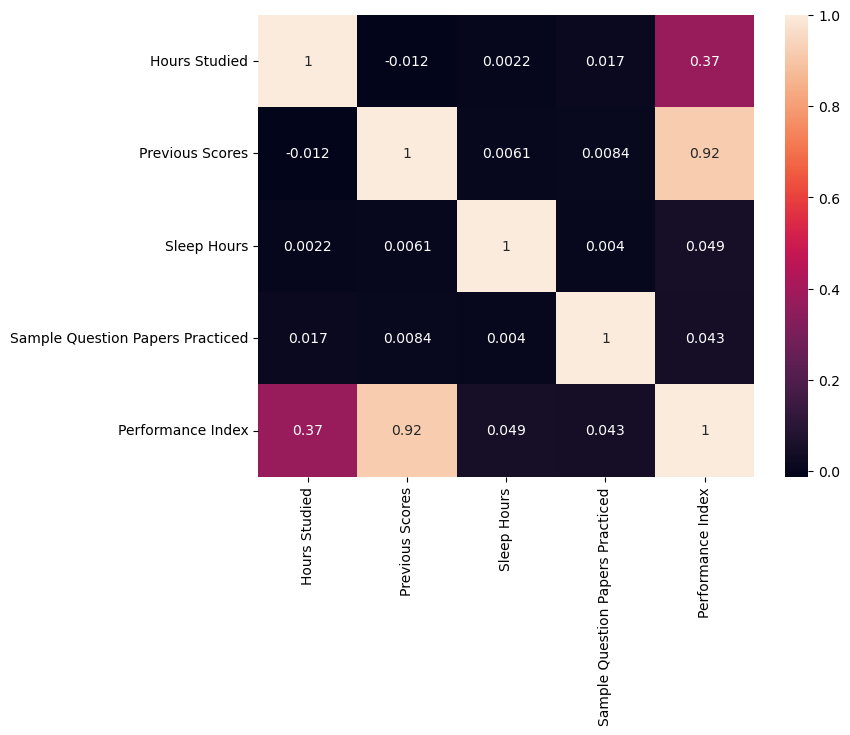

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(),annot = True)
plt.show()

In [15]:
x = data[[ 'Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = data['Performance Index']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.8,test_size = 0.2, random_state = 0)

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(x_test)

In [20]:
y_pred

array([60.0909475 , 39.42708213, 66.4201718 , ..., 68.09193649,
       77.6406599 , 55.24680998])

In [21]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [22]:
mean_squared_error(y_test,y_pred)

4.405381659362542

In [23]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.098900107047151

In [24]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9880969352283833